<a href="https://colab.research.google.com/github/RockNavamuel/youtube_project/blob/main/YouTube_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats


## **Exploratory Analysis**

In [2]:
data = pd.read_csv('youtube_api.csv', index_col = 0)
data.head()

,video_id,video_title,upload_date,upload_time,view_count,like_count,comment_count
0,dnwsUXP9Npo,I Ran into a Hacker and Got Him Banned!,7/10/2023,21:30:03Z,97519,11573,108
1,QMGl4i4YdvE,Fortnite is CHANGING The Big Pot!,7/10/2023,15:45:03Z,259529,24909,228
2,cptFdfvOwU0,I Caught a Cheater In My Fortnite Tournament.,7/9/2023,21:26:58Z,574972,20719,1405
3,RkQNKkJn35s,The Infamous Muselk Incident,7/9/2023,00:00:12Z,2022821,157008,425
4,eHP0QoiZ13E,After 4 Long Years...,7/8/2023,21:03:55Z,1430625,35203,2071


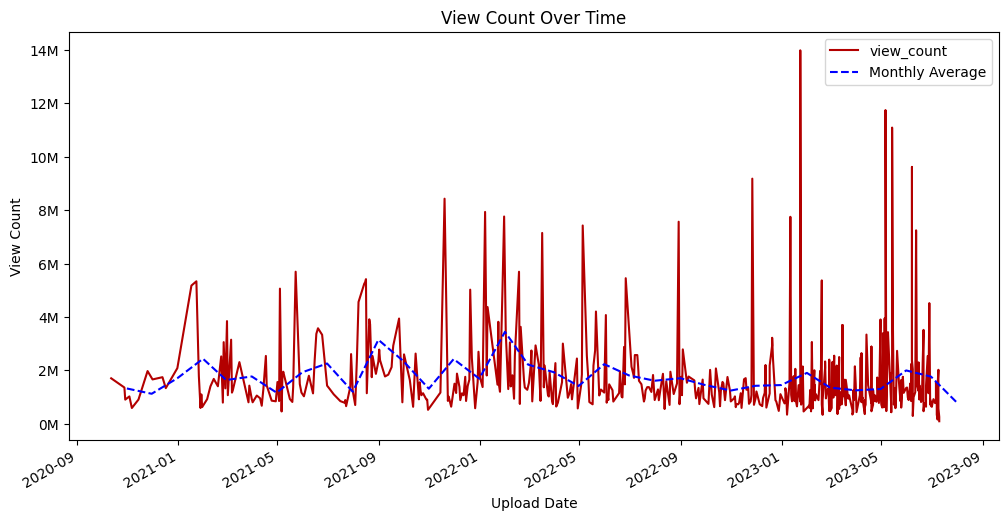

In [3]:
# Convert the 'upload_date' column to datetime format
data = pd.read_csv('youtube_api.csv', index_col = 0)
data['upload_date'] = pd.to_datetime(data['upload_date'])

# Sort the data by the index (upload_date) in ascending order
data.set_index('upload_date', inplace=True)
data.sort_index(inplace=True)

# Calculate average on monthly basis
monthly_average = data['view_count'].resample('M').mean()

# Plot view_count over time
dark_red = (0.7, 0, 0)

fig, ax = plt.subplots(figsize=(12, 6))
data.loc[:, 'view_count'].plot(ax=ax, color=dark_red, ylabel='View Count')

# Custom formatter for y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1e6) + 'M'))

# Plot the monthly average as the trend line
monthly_average.plot(ax=ax, color='blue', linestyle='dashed', label='Monthly Average')

# Set labels
ax.set_xlabel('Upload Date')

plt.title('View Count Over Time')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Top 10 Videos Since 2021')

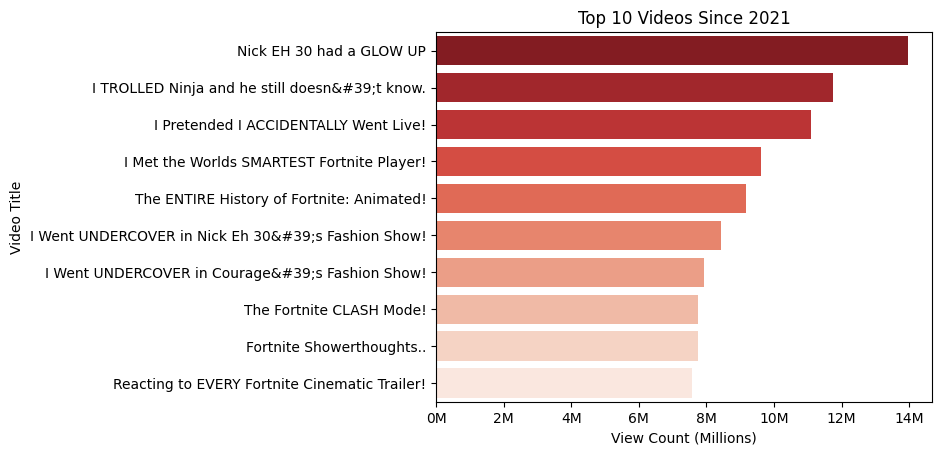

In [4]:
## Best performing videos
chart = sns.barplot(x = 'view_count', y = 'video_title', data = data.sort_values('view_count', ascending = False)[0:10], palette = "Reds_r")

# Format x and y axis
#chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
chart.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1e6) + 'M'))

# Create Labels
chart.set_xlabel('View Count (Millions)')
chart.set_ylabel('Video Title')
plt.title("Top 10 Videos Since 2021")

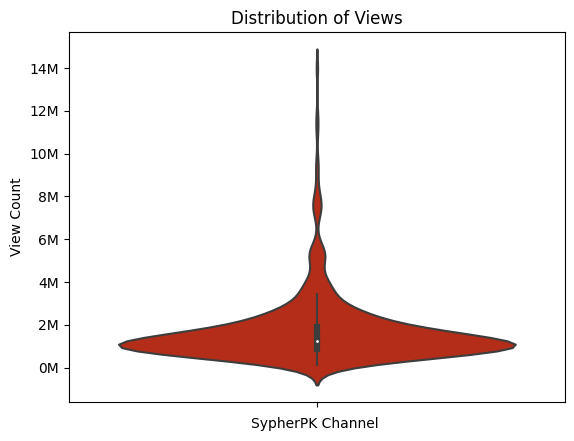

In [5]:
## View Distribution
alt_red = (0.8, 0.1, 0)
dist = sns.violinplot(y = data['view_count'], color = alt_red, quantiles = [.75, .25])
dist.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1e6) + 'M'))

# Set Lables
dist.set_ylabel('View Count')
dist.set_xlabel('SypherPK Channel ')

plt.title('Distribution of Views')
plt.show()

###**Analysis of relationship between View Count and Like Count**

**Plot the relationship**

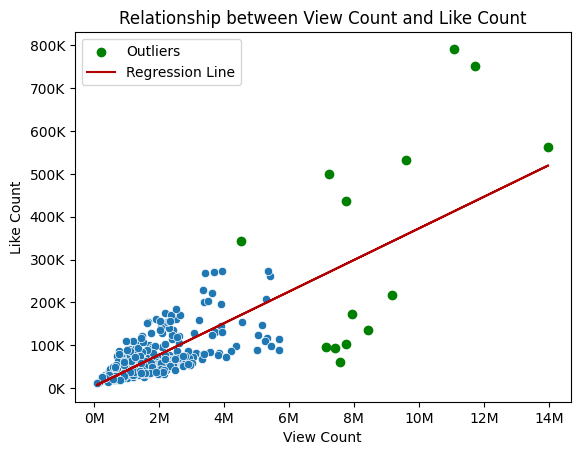

In [6]:
# Calculate z-scores for view_count and like_count
df = data
z_scores_view = stats.zscore(df['view_count'])
z_scores_like = stats.zscore(df['like_count'])

# Set a threshold for considering outliers
z_score_threshold = 3

# Identify outlier indices
outlier_indices = ((z_scores_view > z_score_threshold) | (z_scores_like > z_score_threshold))

# Regression Line
regression_coeffs = np.polyfit(df['view_count'], df['like_count'], 1)
regression_line = np.poly1d(regression_coeffs)

# Create a scatter plot with outliers
vl_scatter = sns.scatterplot(data=df, x='view_count', y='like_count')
plt.scatter(df.loc[outlier_indices, 'view_count'], df.loc[outlier_indices, 'like_count'], color='green', label='Outliers')

# Format x and y axis
vl_scatter.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1e6) + 'M'))
vl_scatter.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1e3) + 'K'))

# Add regression line
plt.plot(df['view_count'], regression_line(df['view_count']), color=dark_red, label='Regression Line')

# Labels
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.title('Relationship between View Count and Like Count')
plt.legend()
plt.show()

**Takeaway**

Based on the plot, it is evident that there exists a positive and somewhat linear relationship between the variables 'View Count' and 'Like Count.' This outcome aligns with our a priori expectation that a higher number of views on a video would likely correspond to an increased likelihood of users liking the video.

However, to ensure the validity of this assumption, let's test this relationship through statistical analysis.

**Linear Regression Model**

In [7]:
import statsmodels.api as sm

# Create a new DataFrame with only the 'view_count' and 'like_count' columns
df_regression = data[['view_count', 'like_count', 'comment_count']]

# Add a constant column to the DataFrame for the intercept term in the regression model
df_regression = sm.add_constant(df_regression)
df_regression.head()

# Fit the regression model
model = sm.OLS(df_regression['like_count'], df_regression[['const','view_count']])
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             like_count   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     799.2
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          4.85e-106
Time:                        03:23:55   Log-Likelihood:                -6152.9
No. Observations:                 506   AIC:                         1.231e+04
Df Residuals:                     504   BIC:                         1.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3674.5543   3032.997      1.212      0.2

**Analysis**

Overall, the regression analysis shows there is a moderately strong relationship between 'View Count' and 'Like Count'.

The Adj R-squared value indicates that 61.2% of the variability in Y('Like Count') is explained by X('View Count'). The p-value less than 0.05 also indicates that the model is statistically significant and our independent variable has significant impact on the dependent variable.

Finally, the model may have some limitations due to non-normality of residuals and presence of high skewness.

### **Finding the optimal time to post**

**Data processing**

In [8]:
# Create a new DataFrame
time_df = data[['video_id', 'view_count', 'upload_time']]

# Create second DataFrame to avoid SettingWithCopy warning
time_df2 = time_df.copy()

# Convert 'upload_time' to datetime format
time_df2['upload_time'] = pd.to_datetime(time_df2['upload_time'])
time_df2.reset_index(inplace=True)

# Create bins for upload_time
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['12-4am', '4-8am', '8-12pm', '12-4pm', '4-8pm', '8-12am']

time_df2['time_bin'] = pd.cut(time_df2.upload_time.dt.hour, bins, labels=labels, right=False)
time_df2.head()

,upload_date,video_id,view_count,upload_time,time_bin
0,2020-10-12,8dF93ogMMlY,1704683,2023-07-31 19:05:01+00:00,4-8pm
1,2020-10-28,sdWzytUl0NQ,1359325,2023-07-31 14:45:03+00:00,12-4pm
2,2020-10-29,ZBJrg5rxXug,906960,2023-07-31 18:10:01+00:00,4-8pm
3,2020-11-03,DN2Q1i1BJ5g,1026480,2023-07-31 16:50:00+00:00,4-8pm
4,2020-11-06,WsDtUtNqHQQ,593077,2023-07-31 19:15:01+00:00,4-8pm


**Visualization**

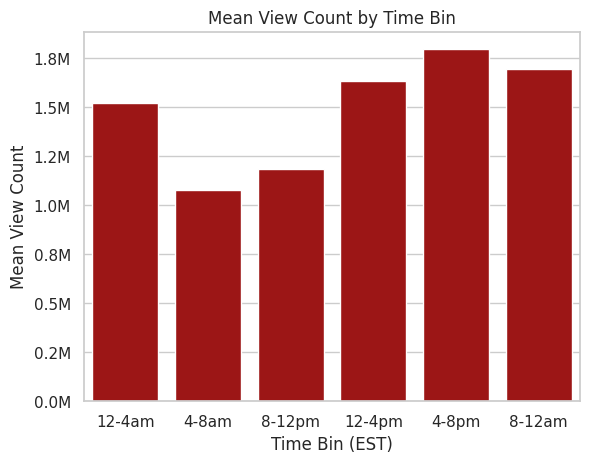

In [9]:
# Create a bar chart
dfg = time_df2.groupby('time_bin', as_index=False)['view_count'].agg([list, 'mean'])

sns.set(style="whitegrid")
dark_red = (0.7, 0, 0)
bin = sns.barplot(data=dfg, x=dfg.index, y='mean', color = dark_red)

# Time_bin labels
plt.xticks(range(len(dfg)), dfg.index)
# Y-axis formatting
bin.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.1f}'.format(x/1e6) + "M"))

# Labels
plt.xlabel('Time Bin (EST)')
plt.ylabel('Mean View Count')
plt.title('Mean View Count by Time Bin')

plt.show()

**Takeaway**

The plot indicates that videos posted later in the day (closer to midnight) perform, on average, better than videos posted earlier. It should be noted that the time bin of 4-8am only has a sample of one video compared to the other time bins.

Now let's test this theory with a Random Forest Classifier for virality.

**Random Forest Model**

In [11]:
# Data processing
time_forest = time_df2.copy()
time_forest['hour'] = time_forest['upload_time'].dt.hour
time_forest['day_of_week'] = time_forest['upload_date'].dt.dayofweek + 1
time_forest["popularity"] = time_forest["view_count"].apply(lambda x: "viral" if x >= 2e6 else "not-viral")

time_forest.head()

,upload_date,video_id,view_count,upload_time,time_bin,hour,day_of_week,popularity
0,2020-10-12,8dF93ogMMlY,1704683,2023-07-31 19:05:01+00:00,4-8pm,19,1,not-viral
1,2020-10-28,sdWzytUl0NQ,1359325,2023-07-31 14:45:03+00:00,12-4pm,14,3,not-viral
2,2020-10-29,ZBJrg5rxXug,906960,2023-07-31 18:10:01+00:00,4-8pm,18,4,not-viral
3,2020-11-03,DN2Q1i1BJ5g,1026480,2023-07-31 16:50:00+00:00,4-8pm,16,2,not-viral
4,2020-11-06,WsDtUtNqHQQ,593077,2023-07-31 19:15:01+00:00,4-8pm,19,5,not-viral


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Create the features
features = time_forest[['hour', 'day_of_week']]

# Create the target
target = time_forest['popularity']

# Split the data into training and testing sets (80% for training, 20% for testing)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Create the model
model = RandomForestClassifier(n_estimators=20)

# Train the model on the training set
model.fit(features_train, target_train)

# Make predictions on the testing set
predictions = model.predict(features_test)

# Evaluate the model on the testing set
f1 = f1_score(target_test, predictions, average = 'weighted')
f1 = round(f1, 4)

print("F1-Score:", f1)

F1-Score: 0.7985


In [104]:
importance_scores = model.feature_importances_
print(importance_scores)

[0.70347015 0.29652985]


**Summary**

A Random Forest Classifier model was created in attempt to understand certain metrics of 'viral' videos. We defined a 'viral' video as having over 2 million views. From there, the model features included both 'hour' and 'day_of_week'. Being that the data is imbalanced in favor of 'not-viral' videos, we utilized the F1 Score to weight the average of both recall and precision.

Overall, the model was able to correctly classify nearly 80% of the testing data. The feature scores of 0.703 and 0.297 indicate that 'hour' was more relevant than 'day_of_week' as a predictor for virality.

**Model Uses:**

This model could potentially leverage the content scheduling optimization and promotional advertisements for YouTube creators. It is important to note that additional factors of virality should be added to the model to avoid any present biases.



## **Natural Language Processing**

In [ ]:
import nltk
# Additional downloads needed
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**Word Cloud**

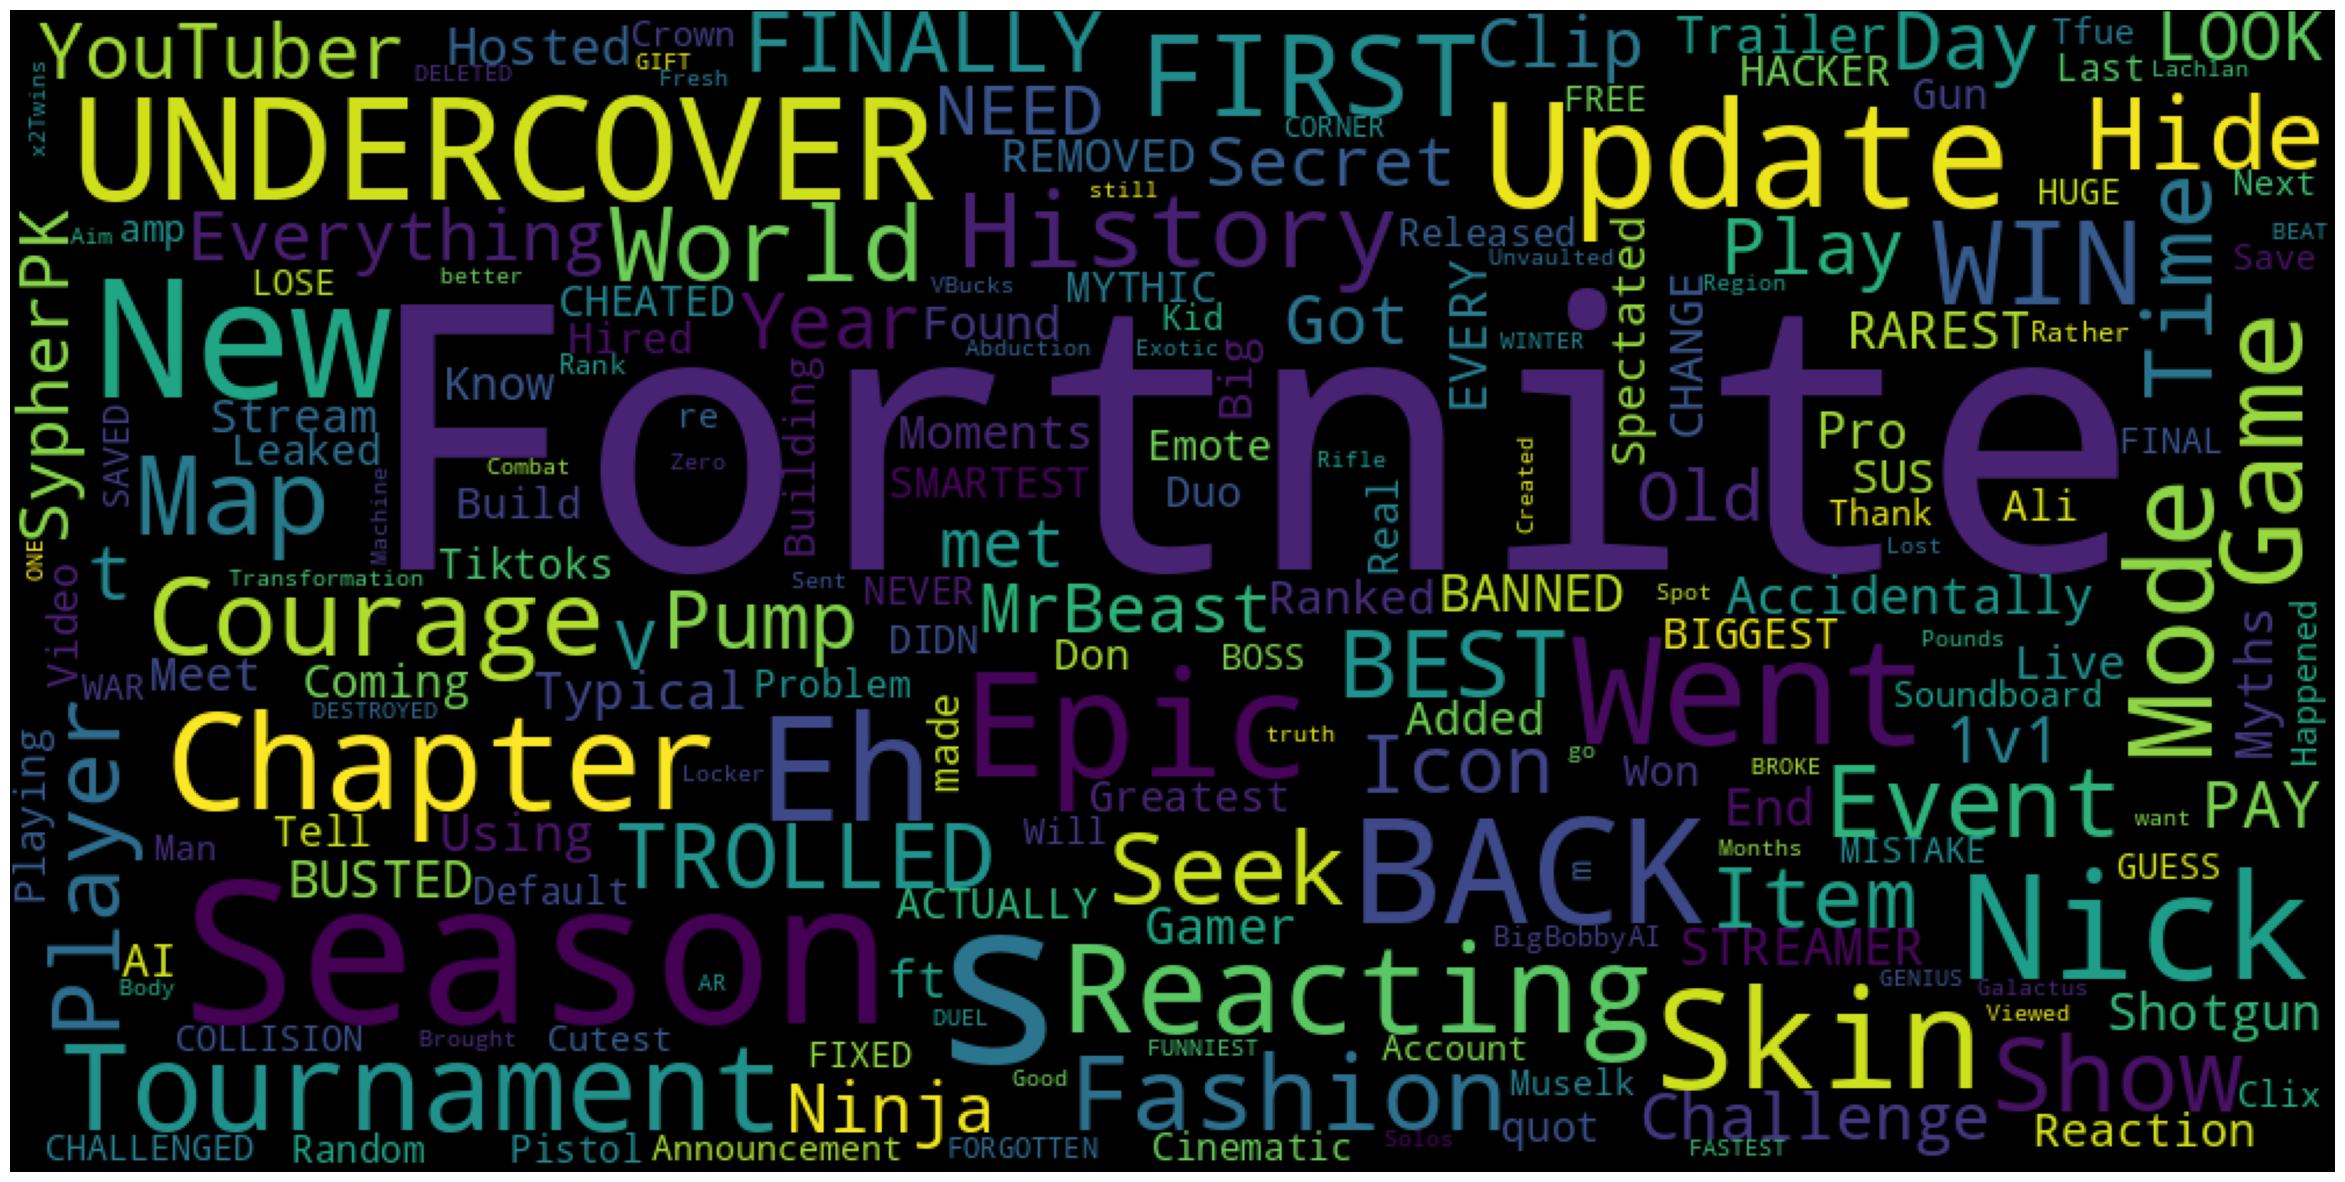

In [ ]:
# Create copy of data
words = data.copy()

# Remove stop words
stop_words = set(stopwords.words('english'))
words['title_no_stopwords'] = words['video_title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

# Create list of all words
all_words = list([a for b in words['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

# Function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

# Create word cloud and plot
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='black',
                      colormap= 'viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

**Sentiment Analysis**

In [ ]:
# Create copy of dataset
emotion = data.copy()

# Create a sentiment analysis object
sid = SentimentIntensityAnalyzer()

# Calculate the sentiment score for each video title
sentiment_scores = []
for title in emotion["video_title"]:
    score = sid.polarity_scores(title)["compound"]
    sentiment_scores.append(score)

# Add the sentiment score to the data
emotion["sentiment_score"] = sentiment_scores

# Print the sentiment scores
emotion.head()


,video_id,video_title,upload_time,view_count,like_count,comment_count,sentiment_score
upload_date,,,,,,,
2020-10-12,8dF93ogMMlY,So I Streamsniped small fortnite streamers.. (...,19:05:01Z,1704683,100684,5238,0.0000
2020-10-28,sdWzytUl0NQ,Fortnite Items NO ONE Remembers...,14:45:03Z,1359325,53483,4583,-0.4466
2020-10-29,ZBJrg5rxXug,NEW Leaked Items Coming To Fortnite!,18:10:01Z,906960,40974,2868,-0.3802
2020-11-03,DN2Q1i1BJ5g,Everything Epic DIDN&#39;T Tell You In The JET...,16:50:00Z,1026480,41040,2879,0.0000
2020-11-06,WsDtUtNqHQQ,The *RANDOM* DEFAULT Skin Challenge!,19:15:01Z,593077,27503,1657,0.1511


In [ ]:
emotion["sentiment_type"] = emotion["sentiment_score"].apply(lambda x: "positive" if x >= 0 else "negative")

# Count the number of videos with each sentiment type
positive_videos = len(emotion[emotion["sentiment_type"] == "positive"])
negative_videos = len(emotion[emotion["sentiment_type"] == "negative"])

# Calculate the percentage of positive videos
positive_percentage = round(positive_videos / len(emotion) * 100, 2)

# Calculate the percentage of negative videos
negative_percentage = round(negative_videos / len(emotion) * 100, 2)

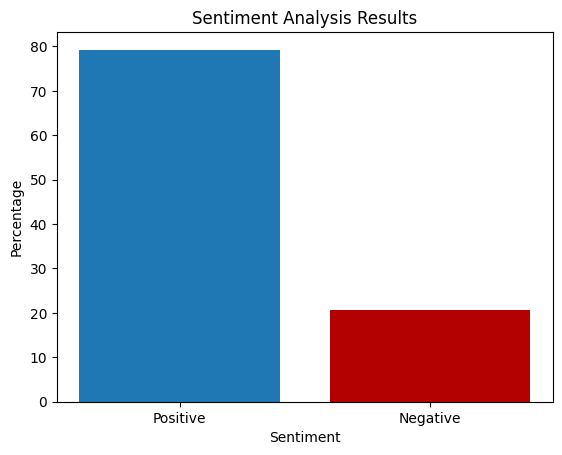

In [ ]:
# Results
# Labels for the bars
labels = ['Positive', 'Negative']

# Heights of the bars
heights = [positive_percentage, negative_percentage]

# Plot the bar chart, use non-red/green pair
plt.bar(labels, heights, color=['#1f77b4', dark_red])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis Results')

# Display the plot
plt.show()


**Analysis**

Overall, 79.25% of videos were classified as having a positive sentiment. Meaning that a majority of published videos on SypherPK's channel evoke positive emotions or were perceived favorably from the video's title.